# **Project Name**    - NYC taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** VISHNU S
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The NYC Taxi Time Prediction project focuses on estimating the duration of taxi trips in New York City by utilizing various factors, including pickup and dropoff locations, time of day, and weather conditions. A regression model was built and then trained using a dataset of over 1.5 million taxi trips, which was divided into training and testing sets at random.

The regression model incorporated features like distance, pickup and dropoff coordinates, pickup datetime, day of the week, and weather variables such as temperature, precipitation, and wind speed.

To assess the model's performance, metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² Score, and Adjusted R² Score were used. The model was also compared with other machine learning algorithms, including Linear Regression, Decision Trees, Random Forest, Gradient Boosting, and XGBoost. Ultimately, the regression model demonstrated superior accuracy, achieving an R² score of 67%.

In conclusion, the NYC Taxi Time Prediction project illustrates how regression models can effectively predict taxi trip durations in New York City by leveraging a mix of factors related to location, time, and distance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To Build a machine learning model that predicts the duration of NYC taxi trip using the dataset which includes pickup time, geo-coordinates, the number of passengers, and several other variables

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [ ]:
# Load Dataset
dataset=pd.read_csv("/content/drive/MyDrive/NYC Taxi Trip Time Prediction/Copy of NYC Taxi Data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
#Making a copy of original dataset
df= dataset.copy()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

In [ ]:
# Finding Rows & Columns count seperately

print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 1458644
Number of columns: 11


In [ ]:
# checking data-types of variables to identify the numerical and categorical variables
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


This operation confirms that our dataset has no missing values. Most data types are correctly formatted; however, the pickup and dropoff date and time are in string format and need to be converted to the appropriate format.

#### Duplicate Values

In [ ]:
#dataset.duplicated() - displays one column of T/F where True is duplicate value

#dataset[dataset.duplicated()] - displays all duplicate rows in each columns

#len(dataset[dataset.duplicated()]) - displays length of the duplicate rows

In [ ]:
print(df.duplicated())

print("\n")
print(df[df.duplicated()])

print("\n")
print(len(df[df.duplicated()]))


0          False
1          False
2          False
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Length: 1458644, dtype: bool


Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration]
Index: []


0


In [ ]:
# Dataset Duplicate Value Count

print("Total number of duplicate values in the dataset is",len(df[df.duplicated()]))

Total number of duplicate values in the dataset is 0


#### Missing Values/Null Values

In [ ]:
#Finding number of null values

df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
# Finding unique values

df.nunique()

,0
id,1458644
vendor_id,2
pickup_datetime,1380222
dropoff_datetime,1380377
passenger_count,10
pickup_longitude,23047
pickup_latitude,45245
dropoff_longitude,33821
dropoff_latitude,62519
store_and_fwd_flag,2


In [ ]:
#Displaying column names

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#Displaying column names using function

def column_nmaes():
 x=pd.DataFrame(index=df.columns)
 return x

column_nmaes()

""
id
vendor_id
pickup_datetime
dropoff_datetime
passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
store_and_fwd_flag


In [ ]:
#Create a table x with column names only (so that in the nextstep we can add a new column to this table x)

#Displaying column names directly without using function

x=pd.DataFrame(index=df.columns)
x

""
id
vendor_id
pickup_datetime
dropoff_datetime
passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
store_and_fwd_flag


In [ ]:
# Adding 3 new columns
# Displaying null values and unique values in a single frame

x["data type"]=df.dtypes
x["null values"]=df.isnull().sum()
x["unique values"]=df.nunique()

#print(x)
x

,data type,null values,unique values
id,object,0,1458644
vendor_id,int64,0,2
pickup_datetime,object,0,1380222
dropoff_datetime,object,0,1380377
passenger_count,int64,0,10
pickup_longitude,float64,0,23047
pickup_latitude,float64,0,45245
dropoff_longitude,float64,0,33821
dropoff_latitude,float64,0,62519
store_and_fwd_flag,object,0,2


In [ ]:
#Not Recommended

#def metho():
  #x=df
  #x["Null Values"]= df.isnull().sum()
  #x["unique values"]=df.nunique()
  #return x

#metho()

<Axes: >

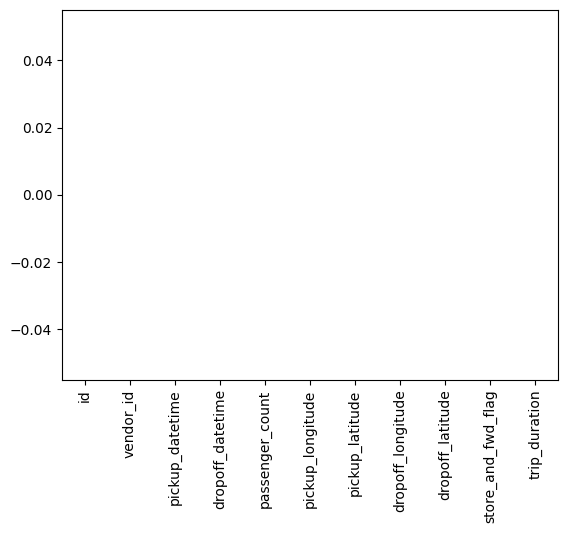

In [ ]:
# Visualizing the missing values

missing_counts = df.isnull().sum()
missing_counts.plot(kind='bar', color='green')

### What did you know about your dataset?

We can see that there is no null value in our data set. Also there is no duplicate values found.

Number of rows: 1458644
Number of columns: 11

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Some insights from the above summary:

Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

### Variables Description

Here’s a description of each variable in this dataset:

1. **id**: A unique identifier for each taxi trip record.
2. **vendor_id**: Identifies the taxi vendor or company providing the service.
3. **pickup_datetime**: The date and time when the taxi trip started.
4. **dropoff_datetime**: The date and time when the taxi trip ended.
5. **passenger_count**: The number of passengers in the taxi during the trip.
6. **pickup_longitude**: The longitude coordinate of the pickup location.
7. **pickup_latitude**: The latitude coordinate of the pickup location.
8. **dropoff_longitude**: The longitude coordinate of the dropoff location.
9. **dropoff_latitude**: The latitude coordinate of the dropoff location.
10. **store_and_fwd_flag**: Indicates whether the trip data was stored and forwarded (1 for true, 0 for false).
11. **trip_duration**: The total duration of the taxi trip, usually measured in seconds.

### Check Unique Values for each variable.

In [ ]:
#Quick Glance
#-------------

#dataset.columns - Gives all columns in the dataset  ( Index(['id', 'vendor_id', 'pickup_datetime' ....)

#dataset.columns.tolist() - Converts to a list (['id','vendor_id','pickup_datetime',..... )

#dataset['hotel'].nunique() -Gives the number of unique values in hotel

#dataset['hotel'].unique() -Gives the unique values in hotel

In [ ]:
# Check number of Unique Values for each variable.

df.nunique()

,0
id,1458644
vendor_id,2
pickup_datetime,1380222
dropoff_datetime,1380377
passenger_count,10
pickup_longitude,23047
pickup_latitude,45245
dropoff_longitude,33821
dropoff_latitude,62519
store_and_fwd_flag,2


In [ ]:
#Quick checking for unique values one by one column name. This is time consuming. So in next step we used for loop.

print(df.columns )

print(df.columns.tolist())

print(df['id'].nunique())
print(df['vendor_id'].nunique())
print('etc....')

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')
['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']
1458644
2
etc....


In [ ]:
#Printing No. of unique values in each column and their Unique values

for i in df.columns:
  print("i value-",i)
  print("No. of unique values in",i,"is :",df[i].nunique())
  print(f"Unique values in '{i}' are {df[i].unique()}\n")

i value- id
No. of unique values in id is : 1458644
Unique values in 'id' are ['id2875421' 'id2377394' 'id3858529' ... 'id2304944' 'id2714485'
 'id1209952']

i value- vendor_id
No. of unique values in vendor_id is : 2
Unique values in 'vendor_id' are [2 1]

i value- pickup_datetime
No. of unique values in pickup_datetime is : 1380222
Unique values in 'pickup_datetime' are ['2016-03-14 17:24:55' '2016-06-12 00:43:35' '2016-01-19 11:35:24' ...
 '2016-01-10 07:35:15' '2016-04-22 06:57:41' '2016-01-05 15:56:26']

i value- dropoff_datetime
No. of unique values in dropoff_datetime is : 1380377
Unique values in 'dropoff_datetime' are ['2016-03-14 17:32:30' '2016-06-12 00:54:38' '2016-01-19 12:10:48' ...
 '2016-04-22 07:10:25' '2016-01-05 16:02:39' '2016-04-05 14:47:43']

i value- passenger_count
No. of unique values in passenger_count is : 10
Unique values in 'passenger_count' are [1 6 4 2 3 5 0 7 9 8]

i value- pickup_longitude
No. of unique values in pickup_longitude is : 23047
Unique value

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# converting into proper date format
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,14,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,6,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,8,8
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,1,10,10
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,22,22
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,5,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_month        1458644 non-null  int32         
 12  dropoff_month       1458644 non-null  int32         
 13  pickup_date 

### What all manipulations have you done and insights you found?

 Changed the Data type of pickup_datetime  and  dropoff_datetime from object to  datetime64[ns]


In [ ]:
# finding pickup month and drop month
df["pickup_month"]=df["pickup_datetime"].dt.month
df["dropoff_month"]=df["dropoff_datetime"].dt.month
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,14,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,6,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,8,8
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,1,10,10
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,22,22
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,5,5


### What all manipulations have you done and insights you found?

Created a new column  pickup_month and dropoff_month which shows the month number of pickup month and drop month

In [ ]:
#finding pickup and drop day
df["pickup_date"]=df["pickup_datetime"].dt.day
df["dropoff_date"]=df["dropoff_datetime"].dt.day
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,14,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,6,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,8,8
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,1,10,10
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,22,22
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,5,5


### What all manipulations have you done and insights you found?

Created a new column  pickup_day and dropoff_day which shows the day number of pickup day and drop day

In [ ]:
# Creating pickup and dropoff weekdays
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,14,14,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,12,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,19,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,6,6,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,26,26,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,8,8,4,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,1,10,10,6,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,22,22,4,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,5,5,1,1


### What all manipulations have you done and insights you found?

Created a new column pickup_weekend and dropoff_weekend which shows the weekend number of pickup day and drop day.

The .dt.weekday method returns an integer representing the day of the week, where:
0 = Monday
1 = Tuesday
2 = Wednesday
3 = Thursday
4 = Friday
5 = Saturday
6 = Sunday

In [ ]:
# Creating pickup and dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,14,14,0,0,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,12,6,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,19,1,1,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,6,6,2,2,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,26,26,5,5,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,4,8,8,4,4,13,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,1,10,10,6,6,7,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,4,22,22,4,4,6,7
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,1,5,5,1,1,15,16


### What all manipulations have you done and insights you found?

Created a new column pickup_hour and dropoff_hour which shows the hour number of pickup date and drop off date.

In [ ]:
#creating pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,14,14,0,0,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,12,12,6,6,0,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,19,19,1,1,11,12,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,6,6,2,2,19,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,26,26,5,5,13,13,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,4,8,8,4,4,13,13,Friday,Friday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,1,10,10,6,6,7,7,Sunday,Sunday
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,4,22,22,4,4,6,7,Friday,Friday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,1,5,5,1,1,15,16,Tuesday,Tuesday


### What all manipulations have you done and insights you found?

Created a new column pickup_day and dropoff_day which shows the day name of pickup day and drop day.


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,14,14,0,0,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,12,12,6,6,0,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,19,19,1,1,11,12,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,6,6,2,2,19,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,26,26,5,5,13,13,Saturday,Saturday


In [ ]:
# calculate trip duration in minute
#Convert from seconds to minutes

df["trip_duration_in_minute"]=df["trip_duration"]/60
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_duration_in_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,14,14,0,0,17,17,Monday,Monday,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,12,12,6,6,0,0,Sunday,Sunday,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,19,19,1,1,11,12,Tuesday,Tuesday,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,6,6,2,2,19,19,Wednesday,Wednesday,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,26,26,5,5,13,13,Saturday,Saturday,7.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,8,8,4,4,13,13,Friday,Friday,12.966667
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,10,10,6,6,7,7,Sunday,Sunday,10.916667
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,22,22,4,4,6,7,Friday,Friday,12.733333
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,5,5,1,1,15,16,Tuesday,Tuesday,6.216667


In [ ]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle

df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)
df['distance']

,distance
0,1.498523
1,1.805510
3,1.485501
4,1.188590
7,5.714989
...,...
1458637,3.537560
1458640,6.049844
1458641,7.824617
1458642,1.092565


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# Calculate average trip duration
average_trip_duration = df['trip_duration_in_minute'].mean()
print(f"Average Trip Duration: {average_trip_duration:.2f} minutes")



Average Trip Duration: 15.99 minutes


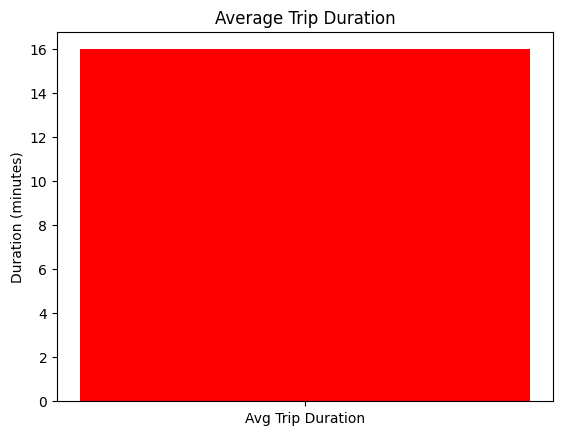

In [ ]:
# Bar chart for average trip duration

import matplotlib.pyplot as plt
plt.bar(['Avg Trip Duration'], [average_trip_duration], color='red')

plt.title('Average Trip Duration')
plt.ylabel('Duration (minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is effective for comparing a single categorical variable (in this case, "Average Trip Duration") against a numerical value. It clearly shows the average duration in a straightforward manner.

##### 2. What is/are the insight(s) found from the chart?

* **Short Trip Trends**: If the average trip duration is around 16 minutes, and considering the average distance as 11 km in this time period, it suggests that many users opt for short rides rather than longer trips.
* **Customer Behavior**: A predominance of short trips may indicate that customers are using the service primarily for local commuting, errands, or short-distance travel rather than long journeys.
* **Revenue Implications**: Frequent short trips can mean more rides per vehicle per day, which could enhance overall revenue, though each individual trip may yield a lower fare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* **Operational Efficiency**: Understanding that most trips are short can help optimize driver allocation and reduce wait times. The company can focus on high-density areas with frequent short-trip demand.

* **Marketing Opportunities**: Insights into short trip trends can inform targeted marketing campaigns, promoting services for quick errands or local commuting.

* **Fleet Optimization**: A focus on short trips may suggest the need for smaller vehicles or alternative transport options (like scooters) to enhance efficiency.

**Negative Growth Insights**:

* **Limited Long-Distance Use**: If most trips are short, it could indicate a lack of usage for longer, potentially more profitable trips. This may point to market saturation in the short-trip segment or a lack of awareness of services for longer distances.

* **Price Sensitivity**: Short trips might lead to lower average fares, which could impact profitability. If users begin to perceive short trips as less valuable, it may lead to challenges in maintaining fare levels.

* **Increased Competition**: A focus on short trips can attract competition from other local transport services, like bikes or scooters, which could further impact market share.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

# Count trips by pickup hour
pickup_hour_counts = df['pickup_hour'].value_counts().sort_index()

print(pickup_hour_counts)


print("pickup_hour_counts.index:",pickup_hour_counts.index)
print("pickup_hour_counts.values:", pickup_hour_counts.values)

pickup_hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: count, dtype: int64
pickup_hour_counts.index: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='pickup_hour')
pickup_hour_counts.values: [53248 38571 27972 20895 15792 15002 33248 55600 67053 67663 65437 68476
 71873 71473 74292 71811 64313 76483 90600 90308 84072 84185 80492 69785]


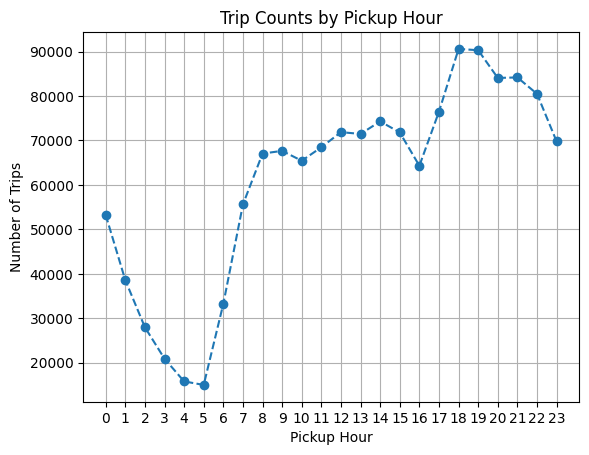

In [ ]:
# Line chart for trip counts by pickup hour

plt.plot(pickup_hour_counts.index, pickup_hour_counts.values, marker='o', linestyle='--')

plt.title('Trip Counts by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

* A line chart is ideal for showing trends over time. Here, it effectively displays the number of trips by hour, allowing easy identification of peak hours and trends throughout the day.

##### 2. What is/are the insight(s) found from the chart?

- **Highest Pickup Hour**: The highest trip count occurs at **18:00 (6 PM)** with **90,600 trips**.
- **Lowest Pickup Hour**: The lowest trip count occurs at **4:00 (4 AM)** with **15,002 trips**.

  # Reasons for High and Low Pickup Hours

- **High Pickup Hours (e.g., 18:00)**:
  - **After Work Commute**: The peak at 6 PM likely reflects people finishing their workday and seeking rides home or to social activities.
  - **Evening Activities**: Increased demand can also stem from individuals heading out for dinner, events, or leisure activities.
  - **Population Density**: Urban areas often experience higher ride demand during this hour due to more people being out and about.

- **Low Pickup Hours (e.g., 4:00)**:
  - **Early Morning**: The 4 AM hour typically sees very few trips since most people are still asleep.
  - **Limited Need**: There’s generally less demand for ride-sharing services during early hours, except for specific needs (e.g., airport trips or night shift workers).
  - **Transportation Alternatives**: Other transportation modes (like personal vehicles or public transport) may dominate during these hours.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact

1. **Enhanced Resource Allocation**:
   - **Driver Availability**: Peak demand times (like 6 PM) allow the company to allocate more drivers, reducing wait times and improving user experience.
   - **Dynamic Pricing**: Implementing higher fares during peak hours can maximize revenue by balancing supply and demand.

2. **Targeted Marketing Efforts**:
   - **Promotional Campaigns**: Identifying off-peak hours (like 4 AM) enables targeted marketing strategies, such as discounts, to attract more riders during low-demand periods.
   - **Partnership Opportunities**: Collaborating with businesses (e.g., airports, hotels) can increase service usage during early morning or late-night hours.

3. **Improved Customer Satisfaction**:
   - **Timely Service**: Sufficient drivers during peak times enhance timely service, leading to higher customer satisfaction and positive referrals.

### Potential Insights Leading to Negative Growth

1. **Heavy Dependence on Peak Hours**:
   - **Revenue Volatility**: Relying on peak hours makes the company vulnerable to disruptions that could significantly reduce demand.
   - **Saturation Risk**: Increased competition during peak times can lead to customer loss if they switch services.

2. **Underutilized Resources During Off-Peak Hours**:
   - **Increased Operational Costs**: Having too many drivers during low-demand periods can result in inefficiencies and higher costs.
   - **Perception of Service Quality**: Inconsistent ride availability during off-peak hours may lead customers to view the service as unreliable.

3. **Market Perception and Positioning**:
   - **Limited Market Expansion**: Catering mainly to peak hours can hinder growth into other segments, like tourism or late-night services.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Compare average trip duration by vendor
vendor_performance = df.groupby('vendor_id')['trip_duration_in_minute'].mean()
vendor_performance


,trip_duration_in_minute
vendor_id,
1,14.090637
2,17.644053


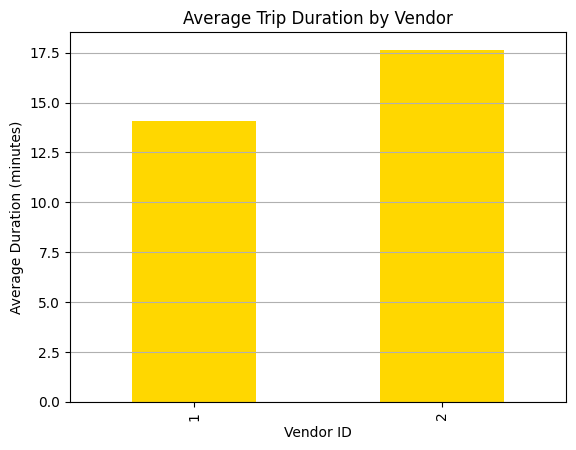

In [ ]:
# Bar chart for average trip duration by vendor
vendor_performance.plot(kind='bar', color='gold')

plt.title('Average Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Duration (minutes)')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is effective for comparing the average trip duration across different vendors. For visual representation, a **bar chart** is suitable as it clearly illustrates the average trip durations for each vendor. This allows for straightforward comparison, making it easy to identify which vendor has longer trips and to analyze potential reasons behind the differences.


##### 2. What is/are the insight(s) found from the chart?

### High and Low Trip Durations

- **Higher Duration**: Vendor 2 with **17.64 minutes**.
- **Lower Duration**: Vendor 1 with **14.09 minutes**.

### Reasons for Differences in Trip Duration

1. **Service Type or Model**:
   - **Vendor 2** might be offering a service that includes longer routes or additional stops (e.g., shared rides), leading to increased trip durations.
   - **Vendor 1** could be focused on quicker, more direct rides, reflecting faster service.

2. **Geographic Coverage**:
   - If Vendor 2 operates in areas with more traffic congestion or longer distances to travel, it can contribute to longer trip durations.
   - Vendor 1 might serve areas with higher accessibility and shorter routes.

3. **Time of Day**:
   - If Vendor 2's trips occur during peak hours when traffic is heavier, this could extend the duration compared to Vendor 1, whose trips may take place during off-peak times.

- **Comparison of Service Efficiency**: The chart shows that Vendor 1 has a shorter average trip duration than Vendor 2, suggesting that Vendor 1 may be more efficient in completing rides.
- **Operational Insights**: The significant difference in trip durations could indicate varying operational strategies between the two vendors, such as route planning, driver management, and target customer segments.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:
- **Resource Optimization**: Understanding the differences in trip durations can help both vendors optimize their operations. Vendor 1 may benefit from further streamlining to maintain short durations, while Vendor 2 can assess ways to reduce trip times, possibly by improving route efficiency or adjusting service models.
- **Customer Segmentation**: The insights may guide targeted marketing strategies. For example, if Vendor 2 focuses on customers needing longer trips (e.g., airport transfers), they can better tailor their services to meet those needs.

**Potential Negative Growth Insights**:
- **Customer Satisfaction Risks**: Longer trip durations (Vendor 2) may lead to customer dissatisfaction, especially if customers prioritize quick rides. If not addressed, this could result in a loss of clientele to more efficient competitors.
- **Market Positioning Challenges**: Vendor 2 might face challenges in positioning itself in a market that favors quicker, more efficient services. If customers perceive it as less reliable due to longer durations, this perception could hinder growth.



In summary, analyzing the trip duration data reveals critical insights into vendor performance and operational efficiency. While there are opportunities for positive impacts through optimization and targeted marketing, addressing potential negative perceptions and satisfaction levels is essential for sustainable growth.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

# Count trips by month
monthly_trip_counts = df['dropoff_month'].value_counts().sort_index()

monthly_trip_counts



,count
dropoff_month,
1,229656
2,238292
3,256135
4,251636
5,248555
6,234243
7,127


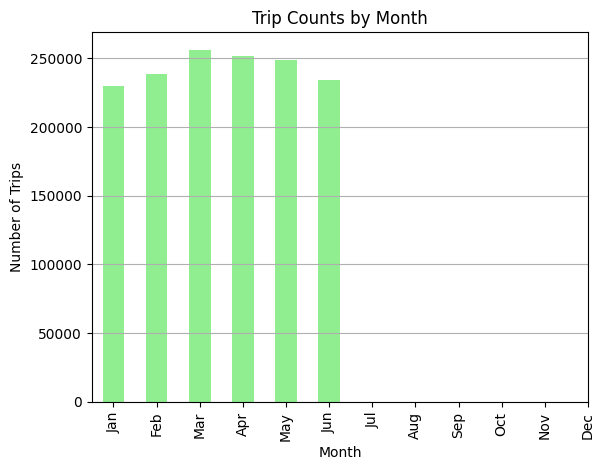

In [ ]:
# Bar chart for trip counts by month
monthly_trip_counts.plot(kind='bar', color='lightgreen')
plt.title('Trip Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart effectively displays the count of trips for each month, making it easy to compare the monthly volumes visually. It clearly shows trends over the months.

##### 2. What is/are the insight(s) found from the chart?

Based on the **trip count by month** data,

- **Highest Count**: **March** (3) with **256,135 trips**.
- **Lowest Count**: **July** (7) with **127 trips**.

### Reasons for High and Low Trip Counts

1. **Seasonal Trends**:
   - **March (High)**: This month may coincide with spring weather, holidays (like spring break), or increased travel activity. These factors likely contribute to the higher number of trips as people take advantage of the improved weather and events.
   - **July (Low)**: The drastic drop in trips could be due to summer vacations when many people travel away from urban areas. Additionally, other transportation options (personal vehicles, public transport) may be more favored during this period.

2. **Event Influence**:
   - **March Events**: Various events, holidays, or festivals in March may boost demand for ride-sharing services as people attend social gatherings or travel to popular destinations.
   - **July Dynamics**: The lack of local events and a shift toward family vacations may lead to lower local ride-sharing usage.

3. **Economic Factors**:
   - **Changing Economic Conditions**: Fluctuations in disposable income or employment can affect travel behavior, with higher disposable income potentially driving increased ride-sharing usage in March.

- **Trend Identification**: The chart reveals a clear upward trend in trip counts from January to March, suggesting growing demand, followed by a decline in July. This insight points to seasonal fluctuations in ride-sharing usage.
- **Potential for Increased Demand**: The sustained trip counts in the spring months indicate potential opportunities for marketing campaigns or partnerships to maximize service usage during peak times.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact**:
- **Resource Optimization**: By recognizing that March sees the highest demand, the company can schedule more drivers and resources to meet this peak. This enhances customer satisfaction due to reduced wait times.
- **Targeted Marketing**: The insights can inform marketing strategies, promoting ride-sharing services in the months leading up to March to capitalize on the expected increased demand.

**Potential Negative Growth Insights**:
- **Seasonal Vulnerability**: The significant drop in July indicates reliance on seasonal demand, posing a risk to revenue stability. If this trend continues, it may affect financial planning and operational efficiency.
- **Customer Retention Risks**: If customers perceive the service as being less available during off-peak months like July, it could lead to decreased customer loyalty and loss of market share to competitors.


Analyzing the trip count data by month provides valuable insights into the factors influencing ride-sharing demand. While there are opportunities for optimizing operations and enhancing marketing strategies during peak months, addressing challenges related to seasonal fluctuations is essential for sustaining growth and maintaining a loyal customer base.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

# Count trips by vendor
vendor_id_counts = df['vendor_id'].value_counts()
print("vendor_id_counts::",vendor_id_counts)

# Calculate total number of trips
total_trips = vendor_id_counts.sum()

# Calculate percentage of trips by vendor
vendor_percentage = (vendor_id_counts / total_trips) * 100

# Display the results
print("\n")
print(vendor_percentage)

#ound off to 1
print("\n")
print(round(vendor_percentage,1))


vendor_id_counts:: vendor_id
2    780302
1    678342
Name: count, dtype: int64


vendor_id
2    53.495027
1    46.504973
Name: count, dtype: float64


vendor_id
2    53.5
1    46.5
Name: count, dtype: float64


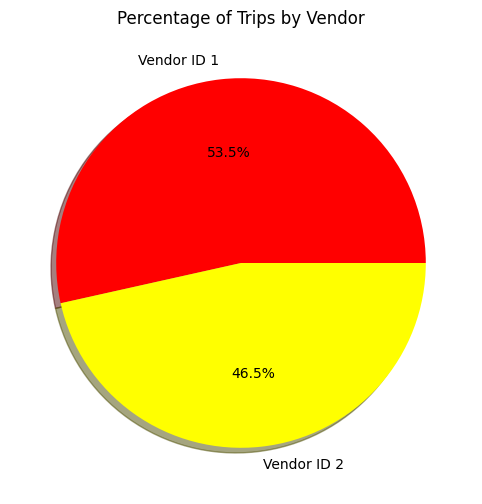

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
#plt.pie(vendor_percentage, labels=vendor_percentage.index, autopct='%1.1f%%',startangle=250, colors=['#ff9999','#66b3ff'])
plt.pie(vendor_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=['red','yellow'],shadow=True)

plt.title('Percentage of Trips by Vendor')
#plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
#Direct way without any % calculation

plt.pie(df['vendor_id'].value_counts(), colors=['lightgreen', 'lightcoral'], autopct='%1.2f%%')

plt.legend(labels=['Y','N'])

##### 1. Why did you pick the specific chart?

Proportional Representation: A pie chart effectively shows the relative sizes of parts to a whole. Since you're interested in the percentage of trips contributed by each vendor, a pie chart visually conveys how each vendor's share compares to the total.

Easy Interpretation: It allows viewers to quickly grasp which vendor has the largest or smallest share of trips at a glance.

Clear Comparison: While it’s generally best to limit categories to avoid clutter, in this case, if you have only a few vendors, a pie chart works well.

##### 2. What is/are the insight(s) found from the chart?

We can observe that vendor 2 has a higher number of bookings (54%).

Based on the percentage of trips by each **vendor_id**, here’s the analysis:

- **Vendor 2**: **53.5%** of trips
- **Vendor 1**: **46.5%** of trips

### High and Low Trip Percentages

- **Higher Percentage**: **Vendor 2** with **53.5%** of total trips.
- **Lower Percentage**: **Vendor 1** with **46.5%** of total trips.

### Reasons for Differences in Trip Percentages

1. **Market Preference**:
   - **Vendor 2** may offer services that are more appealing to a larger segment of customers, such as lower prices, better vehicle options, or more reliable service. This can result in a higher share of trips.
   - **Vendor 1** might cater to a niche market or have different pricing strategies that could limit its overall trip volume compared to Vendor 2.

2. **Service Availability**:
   - If Vendor 2 has a larger fleet or operates in more areas, it could attract more customers, leading to a higher percentage of trips.
   - Vendor 1 might have limited availability, causing fewer customers to choose their service, thus resulting in a lower percentage of trips.

3. **Promotional Strategies**:
   - Vendor 2 may have more effective marketing campaigns or partnerships that drive higher usage.
   - Conversely, Vendor 1 could be lacking in promotional efforts, leading to reduced visibility and customer engagement.


- **Dominance of Vendor 2**: The chart indicates that Vendor 2 captures a larger share of the market, suggesting that it may be performing better in terms of customer satisfaction, service offerings, or market reach.
- **Opportunity for Vendor 1**: The lower percentage for Vendor 1 highlights an opportunity for improvement, such as enhancing service quality, expanding marketing efforts, or exploring partnerships to increase trip volume.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:
- **Targeted Improvement Strategies**: Understanding the differences in trip percentages can help Vendor 1 develop strategies to increase market share, such as refining its service offerings or enhancing marketing efforts.
- **Resource Allocation**: Vendor 2 can focus on maintaining and enhancing its successful strategies while ensuring adequate resources are allocated to meet demand.

**Potential Negative Growth Insights**:
- **Market Share Risks**: If Vendor 1 does not address its lower percentage of trips, it may continue to lose market share to Vendor 2, potentially leading to financial instability.
- **Customer Perception Issues**: A lower percentage may suggest a perception of lower quality or less reliability associated with Vendor 1, which could deter new customers from trying their service.


Analyzing the percentage of trips by vendor provides essential insights into market dynamics and customer preferences. While there are clear opportunities for Vendor 1 to enhance its service and marketing strategies to improve its market share, Vendor 2's higher trip percentage indicates its successful positioning in the market. Addressing the challenges faced by Vendor 1 is crucial for sustainable growth and competitive advantage.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
df["store_and_fwd_flag"].value_counts()

In [ ]:
#Store & Forward flag

plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], explode=[0.5,0], autopct='%1.2f%%')

plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

##### 1. Why did you pick the specific chart?

- Pie charts can quickly show the proportion of trips that were stored versus those sent immediately.

##### 2. What is/are the insight(s) found from the chart?

- "Y" (Yes): The trip data was stored temporarily and then sent to the server later (often because there was no internet connection at the time).

- "N" (No): The trip data was sent to the server immediately without any delay.

- **Dominance of 'Y' (99.45%)**: Nearly all trips use the "Store and Forward" method, ensuring data is captured even in areas with poor connectivity.
- **Minimal 'N' (0.55%)**: Very few trips rely on real-time data transmission, highlighting limited use of immediate data reporting.

* We see there are less than 1% of trips that were stored before forwarding.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



**Positive Impact**:
- **Reliable Data Collection**: The high use of "Store and Forward" ensures trip data is consistently captured, minimizing loss even without real-time connectivity.
- **Operational Stability**: This approach ensures smooth operations in varying network conditions, leading to better data integrity and customer experience.

**Potential Drawbacks**:
- **Limited Real-Time Capabilities**: The low "N" percentage may indicate underutilization of real-time data, which could hinder dynamic decision-making or real-time customer needs.
- **Reliance on Deferred Data**: Heavy dependence on stored data could signal network issues, which may affect service speed and responsiveness in certain areas.

In summary, the system is stable and reliable, but there’s room for improvement in real-time data usage for faster, more responsive service.

#### Chart - 7

In [ ]:
df['pickup_day'].value_counts()


In [ ]:
#Suppose we want to order by Sunday, Monday,Tuesday ... Saturday order

import pandas as pd

# df['pickup_day'] is your column with days of the week
print("one",df['pickup_day'])
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Set 'pickup_day' as a categorical type with the defined order
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=day_order, ordered=True)
print(df['pickup_day'])


# Now sort the values based on the new categorical order
pickup_day_counts = df['pickup_day'].value_counts().sort_index()

print(pickup_day_counts)

In [ ]:
# Chart - 7 visualization code

##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')

sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()


#Comments

#figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5)): This creates a figure with two subplots arranged in 1 row and 2 columns.
#sns.countplot(): Generates the bar plots for pickup and drop-off days.
#ax[0].set_title() and ax[1].set_title(): Titles the individual subplots to indicate what is being plotted.
#Visualization:
#The graph on the left (indexed by ax[0]) shows the number of pickups on each day of the week.
#The graph on the right (indexed by ax[1]) shows the number of drop-offs on each day of the week.

##### 1. Why did you pick the specific chart?

I used a count plot because it effectively visualizes the frequency of categorical data, such as the days of the week in this case. It allows for a clear comparison of the number of pickups and drop-offs on each day, making it easy to identify patterns and trends in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- **Highest Pickup and Drop-off Days**: Friday and Saturday see the highest number of pickups and drop-offs. This suggests increased ride demand on weekends.May be people go out for partying in Friday and Saturday.

- **Lowest Pickup and Drop-off Day**: Sunday has the lowest counts for both pickups and drop-offs, likely due to reduced commuting or activity levels.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact**:
- **Resource Allocation**: The data helps allocate more drivers on Fridays and Saturdays, ensuring sufficient supply during peak demand times.
- **Weekend Marketing**: The business can run promotions or special offers on weekends to capitalize on higher traffic and maximize revenue.

**Potential Negative Insights**:
- **Underutilization on Sundays**: Fewer trips on Sundays might lead to inefficiencies, such as too many drivers on the road without enough demand. Targeted promotions or price cuts on Sundays could help boost demand during this slow period.

In summary, the chart highlights peak activity on weekends, offering opportunities for better resource planning and targeted marketing, while Sunday presents a challenge that could be addressed to optimize performance.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and contains a 'pickup_datetime' column
# Ensure that 'pickup_datetime' is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Count the number of rides for each hour
ride_counts = df['pickup_hour'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
ride_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24), rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
# Chart - 8 visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Our DataFrame is named df and contains a 'pickup_datetime' column

# Ensure that 'pickup_datetime' is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Define time segments
def categorize_time(hour):
    if 5 <= hour < 8:
        return 'Early Morning'
    elif 8<= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Afternoon'
    elif 14 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the categorization function
df['time_segment'] = df['pickup_hour'].apply(categorize_time)

# Count the number of rides for each time segment
ride_counts = df['time_segment'].value_counts()
print(ride_counts)


In [ ]:
# Plotting the bar chart

plt.figure(figsize=(8, 5))
ride_counts.plot(kind='bar', color='lightgreen')

plt.title('Number of Rides by Time Segment of the Day')
plt.xlabel('Time Segment')
plt.ylabel('Number of Rides')

plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar plot because it effectively visualizes the number of rides across different time segments, allowing for clear comparisons between categories and making it easy to identify peak times for rides throughout the day.

##### 2. What is/are the insight(s) found from the chart?

- We can see that Evening (2 PM to 9 PM) is the busiest time segment, with 551,879 rides, indicating that a significant proportion of taxi rides happen during this period, likely due to a combination of work commutes, social activities, and peak traffic times.

- Night (9 PM to 5 AM) is the second busiest segment, with 390,940 rides, showing a high demand for taxi services even during late hours, potentially due to nightlife activities, late-night workers, or airport trips.

- Morning (8 AM to 12 PM) sees 268,629 rides, reflecting the regular morning commute hours, although it has less traffic compared to the evening.

- Afternoon (12 PM to 2 PM) accounts for 143,346 rides, showing moderate activity, possibly capturing lunch-hour travel and early afternoon movements.

- Early Morning (5 AM to 8 AM) has the least number of rides, with 103,850 rides, which may correspond to early commuters or airport trips, but generally represents lower demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**:
- **Driver Availability**: More drivers can be allocated during the evening and night to meet high demand, reducing wait times and improving customer satisfaction.
- **Dynamic Pricing**: Implementing surge pricing during peak periods like the evening can maximize revenue for both the company and drivers.

**Potential Negative Insights**:
- **Underutilized Resources in Off-Peak Hours**: Low demand during the early morning and afternoon could lead to inefficiencies, where drivers are available but not earning enough. Addressing this with targeted promotions could help balance demand.
  
In summary, the insights highlight peak times for ride demand, especially in the evening, allowing the business to optimize driver allocation and pricing strategies. However, off-peak hours present challenges that need to be addressed to avoid resource underutilization.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=df,color='gold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

#Aggegate vendor id by pickup month
monthly_pickup_by_vendor=df.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()
monthly_pickup_by_vendor


In [ ]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

##### 1. Why did you pick the specific chart?

* A line chart is a good choice for this data because:

* **Trend Visualization**: Line charts are great for showing how values change over time. In this case, you can easily observe how the number of pickups (for both vendor IDs) changes across different months.

* **Comparison Between Multiple Series**: With two vendor IDs, a line chart allows us to compare their pickup trends side by side. Each line represents a vendor's pickups over time, making it easy to spot similarities or differences in trends.

* **Clarity Over Time**: Since our data spans several months, the line chart can help us to understand the direction of the change for each vendor (whether the pickups are increasing, decreasing, or remaining stable).

* **Smooth Data Flow**: A line chart gives a sense of continuity, which is useful when dealing with time series data like monthly pickups. It helps in connecting the dots in a way that bar charts or pie charts cannot.

##### 2. What is/are the insight(s) found from the chart?

* We can see that both vendors' trips are at their **maximum** in the month of March and their **lowest** in the month of January, February, and after June.

* **Performance Comparison**: Vendor 2 consistently outperforms Vendor 1 in pickups across all months, indicating stronger market presence or customer preference.

* **Monthly Trends**:Both vendors show growth from January to March, peaking in March with Vendor 1 at 118,813 pickups and Vendor 2 at 137,376.

* **Slight Decline**: A slight decrease in pickups occurs from April to June, suggesting a seasonal dip after the March peak.

* **Average Difference**:Vendor 2 averages 10,000 to 13,000 more pickups than Vendor 1 each month, highlighting areas for improvement for Vendor 1.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact from Gained Insights

#### Understanding Peak Performance

- **Actionable Strategies**: Since both vendors peak in March, the business can analyze what drives this success—be it promotions, product offerings, or marketing campaigns—and replicate these strategies in other months to boost overall performance.

- **Increased Marketing Efforts**: Knowing that March is a high point, the business can implement targeted marketing efforts leading up to this month to maximize sales, such as special promotions or campaigns to attract customers.

#### Market Presence of Vendor 2

- **Benchmarking**: Vendor 1 can use Vendor 2’s performance as a benchmark. Understanding the reasons behind Vendor 2’s stronger performance could lead to improvements in Vendor 1’s strategies, whether through enhancing customer engagement, improving service quality, or refining product offerings.

- **Investment in Growth**:  Recognizing that Vendor 2 consistently outperforms Vendor 1 provides an opportunity for investment in areas where Vendor 1 may be lacking, thus fostering competitive growth.

#### Addressing Seasonal Trends

- **Preparing for Seasonal Dips**: With the observed slight decline in pickups from April to June, the business can proactively address this by planning promotions, adjusting inventory, or enhancing marketing efforts during these months to mitigate the seasonal dip.


### Insights Leading to Negative Growth

#### Slight Decline After Peak

- **Reason for Concern**: The decline in pickups from April to June suggests that both vendors may be experiencing a seasonal downturn. This could indicate a lack of engagement or interest from customers after the peak season, potentially leading to a loss of market momentum.

- **Justification**:If this trend continues without intervention, it could result in decreased revenues and lower customer retention, highlighting the need for proactive measures to sustain interest in the products or services offered.

#### Average Difference Between Vendors

- **Vendor 1’s Underperformance**: The average difference of 10,000 to 13,000 fewer pickups for Vendor 1 indicates that this vendor is not meeting market expectations. This consistent gap could lead to negative perceptions among consumers regarding Vendor 1’s offerings.

- **Justification for Negative Growth**: If Vendor 1 fails to identify and address the reasons behind its lower performance (such as product quality, pricing, or customer service), it risks losing customers to Vendor 2 permanently. This gap can lead to long-term negative growth if not addressed.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

#Passenger Count
df.passenger_count.value_counts()

In [ ]:
# distribution of passenger
plt.figure(figsize=(10,5))
sns.countplot(x=df["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked a bar plot because it is effective for showing the frequency distribution of categorical data, such as the number of passengers per trip. This allows us to easily see how often different passenger counts occur in the dataset and provides a clear comparison across categories. The bar plot is especially useful here to highlight the most common group sizes in taxi rides.

##### 2. What is/are the insight(s) found from the chart?

* **Single-passenger trips dominate**: The overwhelming majority of trips involve just one passenger. This indicates that most taxi rides are taken by individuals rather than groups.
* There are fewer trips with larger groups of passengers (2–6), and almost no trips with more than 6 passengers.
* The count of trips with exactly 0 passengers is very small, but its presence may indicate either canceled trips or errors in the data collection process.
* We can notice that most of the bookings are made by solo traveler whom prefer to ride solo

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive business impact**: The insight that most rides are single-passenger can help optimize pricing strategies and operational planning, as taxis may not need to frequently accommodate large groups. Businesses can focus on providing services tailored to individuals, such as ridesharing options or premium solo rides. Moreover, fleet management can be optimized by offering more smaller vehicles, which could reduce operational costs.

* **No clear negative growth insights**: There’s no direct indication of negative growth from this data, but understanding why there are trips with 0 passengers could help eliminate any underlying inefficiencies or issues, improving data quality and service delivery.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

# divide trip duration in differnt bins
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']

In [ ]:
#Plotting graph using bar

plt.figure(figsize=[10,5])
df1=pd.cut(df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar')

plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* I picked a bar plot because it effectively shows the distribution of taxi trips across different trip duration categories. Bar plots are ideal for comparing the frequency of different categories, making it easy to see which trip durations are most common.
* This type of visualization helps in quickly identifying patterns in trip duration distribution and makes the data more interpretable at a glance.

##### 2. What is/are the insight(s) found from the chart?

* The majority of trips fall within the 10-minute and 30-minute categories, suggesting that most taxi rides are relatively short.
* There are very few trips lasting less than 1 minute or extending beyond a day. The significant drop in the count of trips that last over an hour indicates that long trips are rare.
* Most trips are efficiently completed within a short time frame, making them ideal for high turnover and frequent customer service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive business impact**: Knowing that the majority of trips are completed within 10 to 30 minutes can help in optimizing fleet management, as shorter trips mean higher customer turnover. This insight could also help drivers and businesses in setting expectations for fuel usage, wear and tear, and pricing strategies.

* **No direct negative impact**: However, very short trips (less than 1 minute) might suggest anomalies such as canceled trips or errors in data recording, which could impact service quality. Investigating these trips may help reduce such occurrences and improve customer satisfaction.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for relevant numerical columns
corr_matrix = df[['passenger_count', 'pickup_hour', 'dropoff_hour', 'trip_duration_in_minute', 'pickup_weekday', 'dropoff_weekday']].corr()




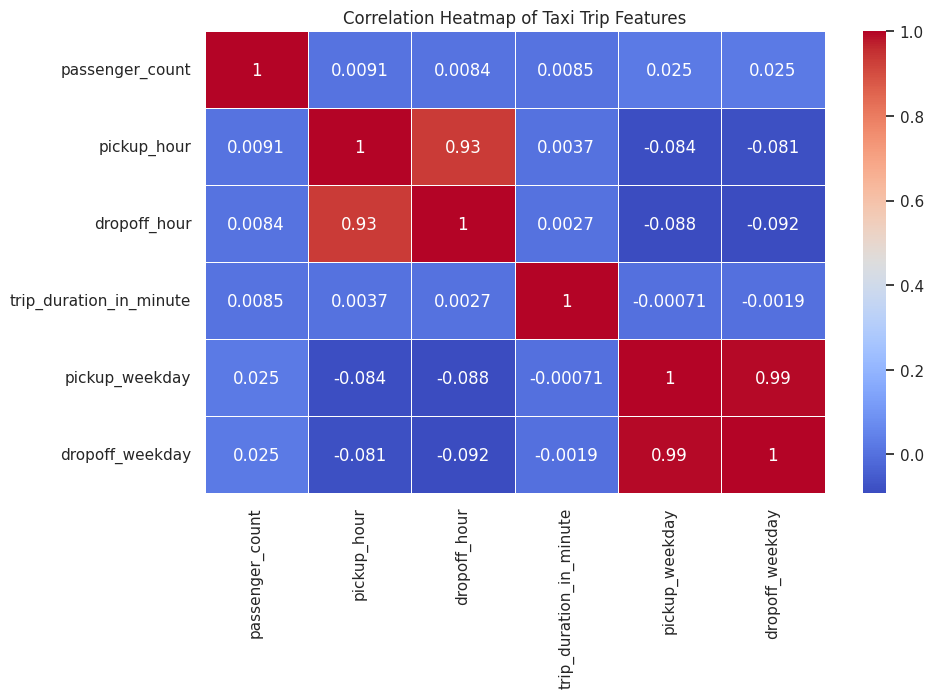

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Taxi Trip Features')
plt.show()


##### 1. Why did you pick the specific chart?

* I used a heatmap because it visually represents the correlation between numerical features in a dataset, making it easier to identify patterns and relationships.
* For instance, in this case, the heatmap helps us see how variables like 'pickup_hour', 'dropoff_hour', and 'trip_duration_in_minute' are related to one another. The color scale indicates the strength and direction (positive or negative) of these correlations, allowing us to quickly spot significant connections or lack thereof between variables, which might be harder to detect in raw numerical data.

##### 2. What is/are the insight(s) found from the chart?

* **Strong correlation between pickup and dropoff hours**: The heatmap shows a high positive correlation (0.93) between pickup and dropoff hours, which is expected since trips typically occur within a short timeframe.

* **Weekday relationships**: Pickup and dropoff weekdays are also highly correlated, indicating that most trips begin and end on the same day, which aligns with normal taxi trip behavior.

* **Weak correlation with trip duration**: There is very little correlation between trip_duration_in_minute and other factors such as pickup or dropoff hour, indicating that the trip length is relatively independent of these time-related variables.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive impact**: The insights can help in operational planning. For example, the strong correlation between pickup and dropoff hours can assist in predicting when most trips will end, allowing better scheduling of taxis. Understanding that trips generally stay within the same hour or day could help optimize fleet deployment and reduce idle time.

* **No immediate negative growth indications**: There doesn’t appear to be any insights from the heatmap that would suggest negative business growth. However, since there is weak correlation with trip duration, it indicates that factors beyond the provided variables (perhaps location, traffic conditions, or specific client needs) are likely driving trip duration. Improving the understanding of these other factors could be key to maximizing profitability by optimizing routes or predicting longer, higher-value trips.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Text(0.5, 1.0, 'distribution after applying log transformation')

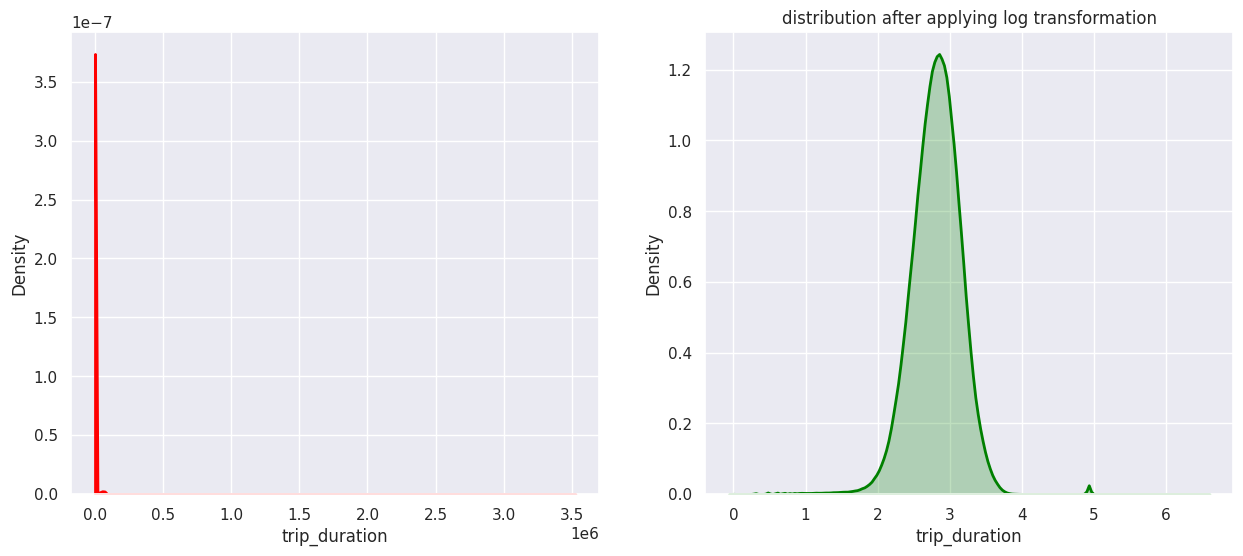

In [ ]:
# dist plot of trip duration.
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.trip_duration,color='red',ax=ax[0],hist=False,kde_kws= {'shade':True, 'linewidth':2})
sns.distplot(np.log10(df["trip_duration"]),color='green',ax=ax[1],hist= False,kde= True,kde_kws= {'shade':True, 'linewidth':2})
ax[1].set_title("distribution after applying log transformation")

By above distribution we can see that target variable is higly right skewed .to remove the skewness we apply log transformation.after transformation we found normal distribution of targer variable.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers


Interquartile range measures the spread of the middle half of our data.

Formula: Q3 - Q1

where Q1- quartile 1 and Q3- quartile 3

lower limit of the data is given by Q1-1.5*IQR

upper limit of the data is given by Q3+1.5*IQR

<Axes: ylabel='distance'>

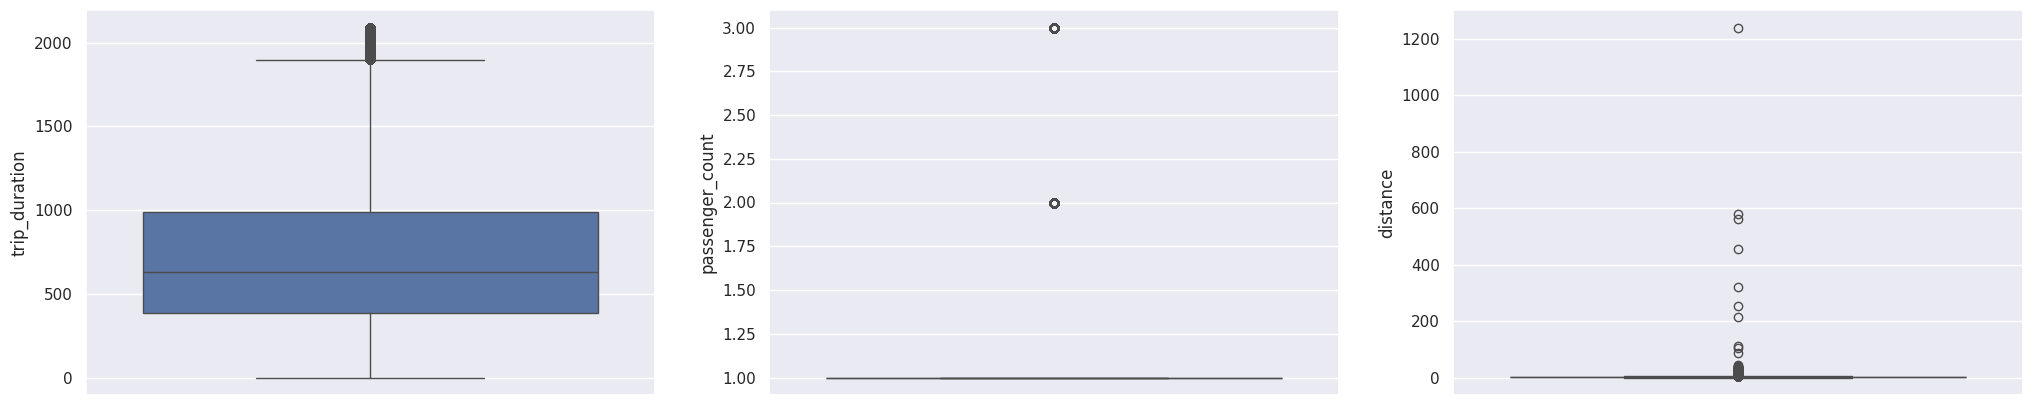

In [ ]:
# Handling Outliers & Outlier treatments

#boxplot for visualizing for outliers
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,5))
sns.boxplot(df["trip_duration"],ax=ax[0])
sns.boxplot(df['passenger_count'],ax=ax[1])
sns.boxplot(df['distance'],ax=ax[2])

In [ ]:
#finding differnt quarters of trip_duration column
trip_duration_Q1=df['trip_duration'].quantile(0.25)
print('first quartile value ie 25th percentile of trip duration:',trip_duration_Q1)
trip_duration_Q2=df['trip_duration'].quantile(0.50)
print('second quartile value ie 50th percentile of trip duration:',trip_duration_Q2)
trip_duration_Q3=df['trip_duration'].quantile(0.75)
print('third quartile value ie 75th percentile of trip duration:',trip_duration_Q3)

first quartile value ie 25th percentile of trip duration: 397.0
second quartile value ie 50th percentile of trip duration: 662.0
third quartile value ie 75th percentile of trip duration: 1075.0


In [ ]:
# calculate interquartile range
IQR=trip_duration_Q3-trip_duration_Q1
print('IQR:',IQR)
trip_duration_lower_limit=trip_duration_Q1-1.5*IQR
trip_duration_upper_limit=trip_duration_Q3+1.5*IQR
print('The lower limit of trip duration:',trip_duration_lower_limit)
print('The upper limit of trip duration:',trip_duration_upper_limit)

IQR: 678.0
The lower limit of trip duration: -620.0
The upper limit of trip duration: 2092.0


In [ ]:
#removing outliers in trip_duration features
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<trip_duration_upper_limit]

In [ ]:
df.shape

(1384320, 22)

In [ ]:
#finding differnt quarters of passenger_count column
passenger_count_Q1=df['passenger_count'].quantile(0.25)
print('first quartile value ie 25th percentile of passenger count:',passenger_count_Q1)
passenger_count_Q2=df['passenger_count'].quantile(0.50)
print('second quartile value ie 50th percentile of passenger count:',passenger_count_Q2)
passenger_count_Q3=df['passenger_count'].quantile(0.75)
print('third quartile value ie 75th percentile of passenger count:',passenger_count_Q3)

first quartile value ie 25th percentile of passenger count: 1.0
second quartile value ie 50th percentile of passenger count: 1.0
third quartile value ie 75th percentile of passenger count: 2.0


In [ ]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("The lower limit of passenger count:", passenger_count_lower_limit)
print("The upper limit of passenger count:", passenger_count_upper_limit)

The lower limit of passenger count: -0.5
The upper limit of passenger count: 3.5


In [ ]:
# Removing outliers
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<passenger_count_upper_limit]

In [ ]:
df.shape

(1237987, 22)

In [ ]:
#finding differnt quarters of distance column
distance_Q1=df['distance'].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',distance_Q1)
distance_Q2=df['distance'].quantile(0.50)
print('second quartile value ie 50th percentile of distance:',distance_Q2)
distance_Q3=df['distance'].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',distance_Q3)

first quartile value ie 25th percentile of distance: 1.197497120120381
second quartile value ie 50th percentile of distance: 1.9919619004442215
third quartile value ie 75th percentile of distance: 3.4835674136716936


In [ ]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("The lower limit of distance:", distance_lower_limit)
print("The upper limit of distance:", distance_upper_limit)

The lower limit of distance: -2.231608320206588
The upper limit of distance: 6.912672853998663


In [ ]:
# Removing outliers
df=df[df['distance']>0]
df=df[df['distance']<distance_upper_limit]

<Axes: xlabel='trip_duration', ylabel='Density'>

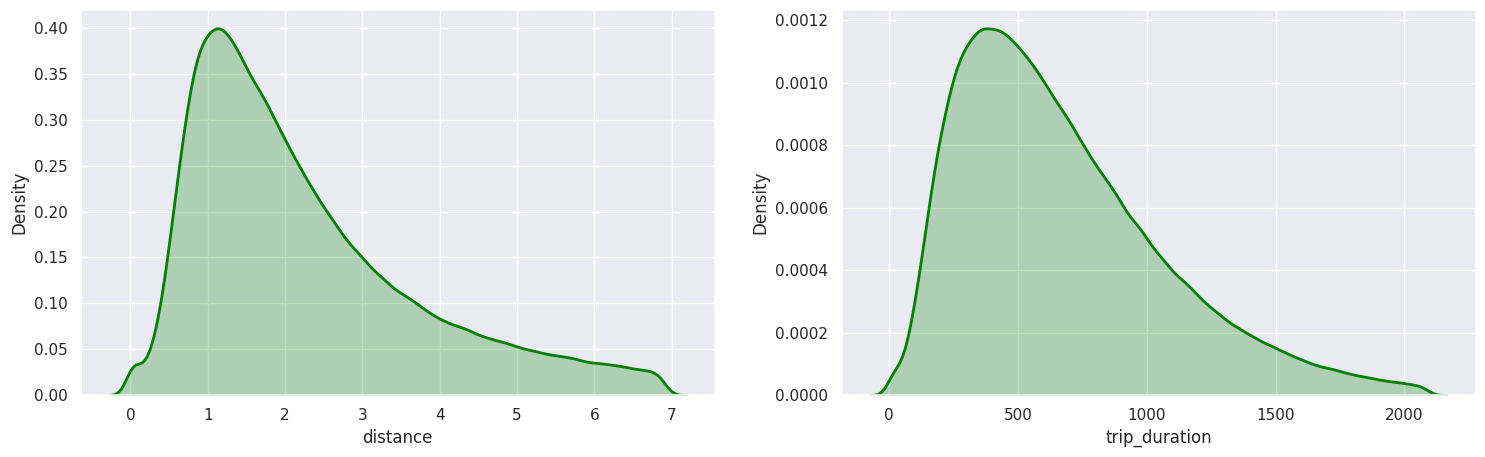

In [ ]:
# Earlier we saw that distance and tripduration had highly skewed graph... lets check the distribution again
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
sns.distplot(df['distance'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[0])
sns.distplot(df['trip_duration'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[1])

##It seems both the columns now follow near to normal distribution

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

#Textual Data Preprocessing

- ONE HOT ENCODING

   Since we have textual data in our dataset which might create problems during model prediction, therefore we need to convert this textual data into dummy variables

In [ ]:
#add dummy variable to convert textual data to numerical data through one hot encoding
df=pd.get_dummies(df,columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'],drop_first=True)


In [ ]:
df.shape

(1136749, 33)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'dropoff_month', 'pickup_date', 'dropoff_date',
       'pickup_hour', 'dropoff_hour', 'pickup_day', 'dropoff_day',
       'trip_duration_in_minute', 'distance', 'store_and_fwd_flag_Y',
       'pickup_weekday_1', 'pickup_weekday_2', 'pickup_weekday_3',
       'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6',
       'dropoff_weekday_1', 'dropoff_weekday_2', 'dropoff_weekday_3',
       'dropoff_weekday_4', 'dropoff_weekday_5', 'dropoff_weekday_6'],
      dtype='object')

- Instead of dropping irrelevant or collinear columns we will be creating a separate list containg only those variables that are important and are not collinear
##(dropoff_date', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday', 'trip_duration_minute are highly correlated according to the heatmap.)

In [ ]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_Y','pickup_weekday_1',
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6']

In [ ]:
final_df=df[features]
final_df.shape

(1136749, 14)

Split Data
Lets split our data first before scaling the features

In [ ]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = nyc_df[features].apply(zscore)[:100000]
y=nyc_df['trip_duration_hour'][:100000]

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

## ***7. ML Model Implementation***

In [ ]:
# define a  function to calculate evaluation metrics
def evaluation_metrics (x_train,y_train,y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)
  # plotting actual and predicted values
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red')
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)


In [ ]:
x=final_df[features]
y=df["trip_duration_in_minute"]

In [ ]:
# Importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### ML Model - 1

#Linear Regression


Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

Mean Squared Error: 22.5249 Root Mean Squared Error: 4.746040454947682
R2 Score : 0.48710009447510016 Adjusted R2 Score : 0.4870921983622618


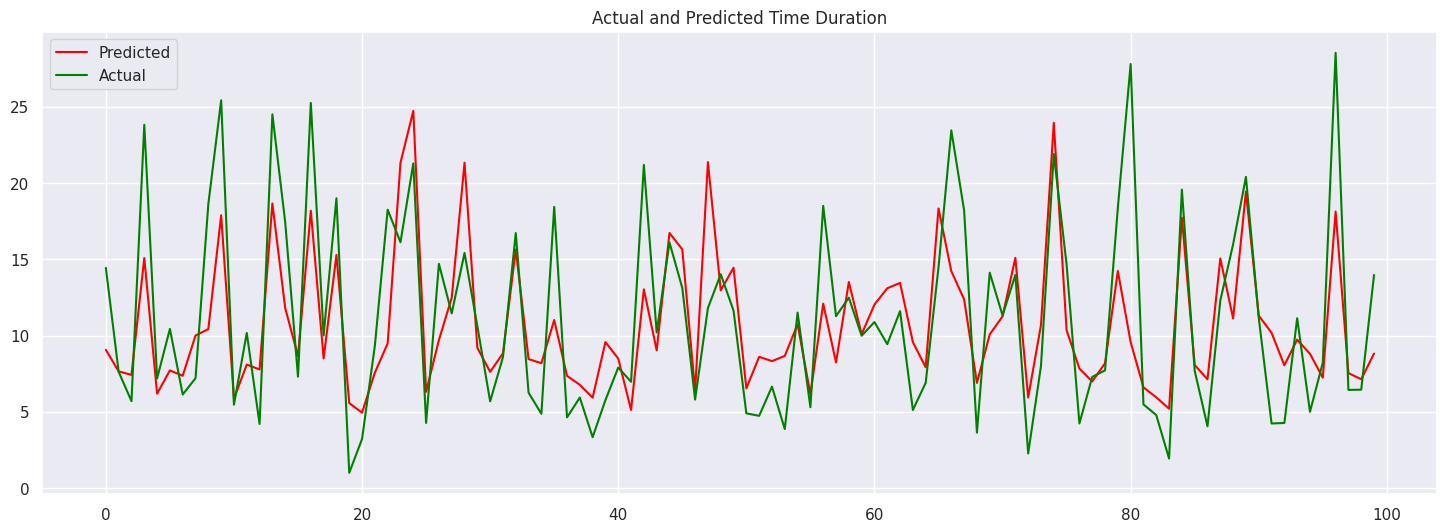

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 22.4453 Root Mean Squared Error: 4.737647095341737
R2 Score : 0.48885358400792245 Adjusted R2 Score : 0.4888221060136678


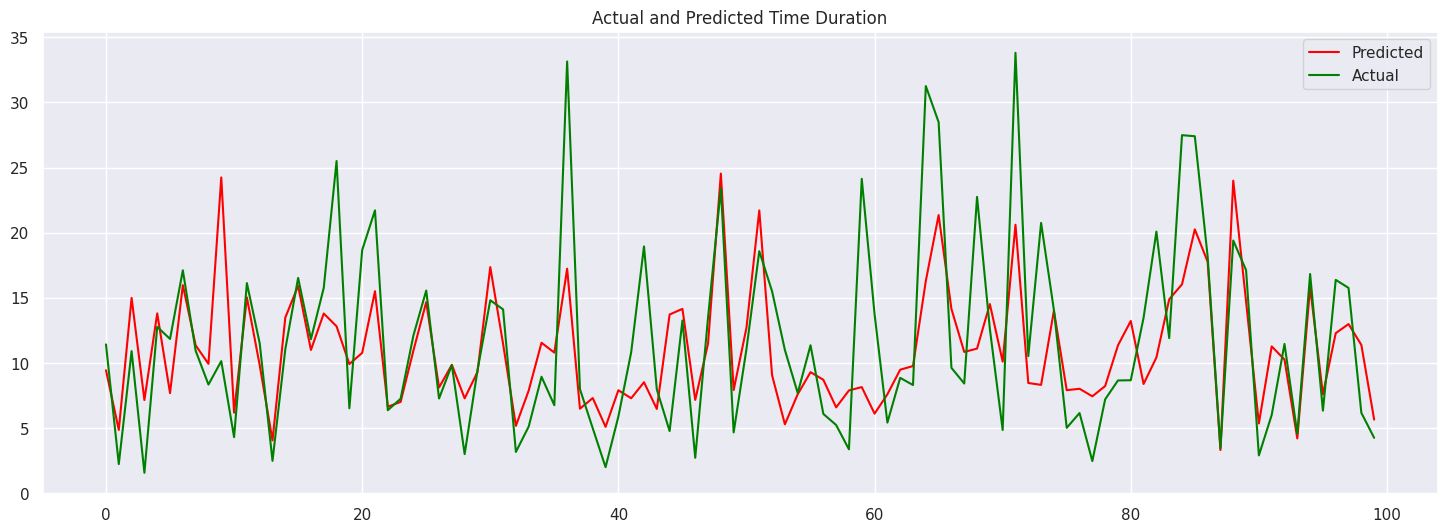

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)

Inference - As we can see that R2 score is very less and MSE is pretty high which means this algorithm is not suitable for our model


In [ ]:
#OPTIONAL
-----------

# ML Model - 1 Implementation

# Fit the Algorithm


regression=LinearRegression()

#You fit a regression model to x_train and y_train to learn the relationship between features and the target variable
regression.fit(x_train,y_train)

print(regression.coef_)

#Once the model is trained, you can check its performance using regression.score(x_train, y_train). This gives the  𝑅2 score, which tells you how well your model fits the training data.
a=regression.score(x_train, y_train)
print(a)

y_pred_train = regression.predict(x_train)
y_pred_test = regression.predict(x_test)

[  3.23386339   0.1247941    1.82377449   2.51979868 -28.24368487
   2.76561534  -9.27421168   0.85157495   1.97035421   1.69830279
   2.11995368   1.74237916   1.13985685  -0.31786508]
0.008215282760693055


In [ ]:
# evaluation metrics for train data set
print(y_pred_train)

[17.95790966 14.20527955 13.96624733 ... 25.51869261  9.22189601
 31.80419697]


In [ ]:
print(y_train)

1053743    18.883333
273748     14.783333
433988     11.433333
1442481    13.633333
1025834    15.850000
             ...    
259178     21.350000
1414414    13.883333
131932     21.416667
671155      6.483333
121958     26.166667
Name: trip_duration_in_minute, Length: 1166915, dtype: float64


In [ ]:
print(y_pred_test)

[16.92609914 12.72684696 12.81311836 ... 13.37356443 14.588707
 18.27984992]


In [ ]:
print(y_test)

67250      17.333333
1397036    13.783333
1021087    10.233333
951424     14.450000
707882     82.783333
             ...    
1155311    19.600000
706393     22.516667
1332537     7.800000
1223876    16.916667
589044     25.500000
Name: trip_duration_in_minute, Length: 291729, dtype: float64


In [ ]:
MSE=mean_squared_error(y_pred_train,y_train)
MSE

8716.79127626337

In [ ]:
RMSE=math.sqrt(MSE)
RMSE

93.36375783066666

In [ ]:
R2_score=r2_score(y_pred_train,y_train)
R2_score

-119.72435558573703

In [ ]:
Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
Adjusted_R2_score

-119.72580398832355

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE=mean_absolute_percentage_error(y_pred_train,y_train)
MAPE

0.5057023675303456

In [ ]:
mean_squared_error(y_pred_test,y_test)

2866.10962797309

Mean Squared Error: 8716.7913 Root Mean Squared Error: 93.36375795778574
R2 Score : 0.008215282760693055 Adjusted R2 Score : 0.00820338372389362


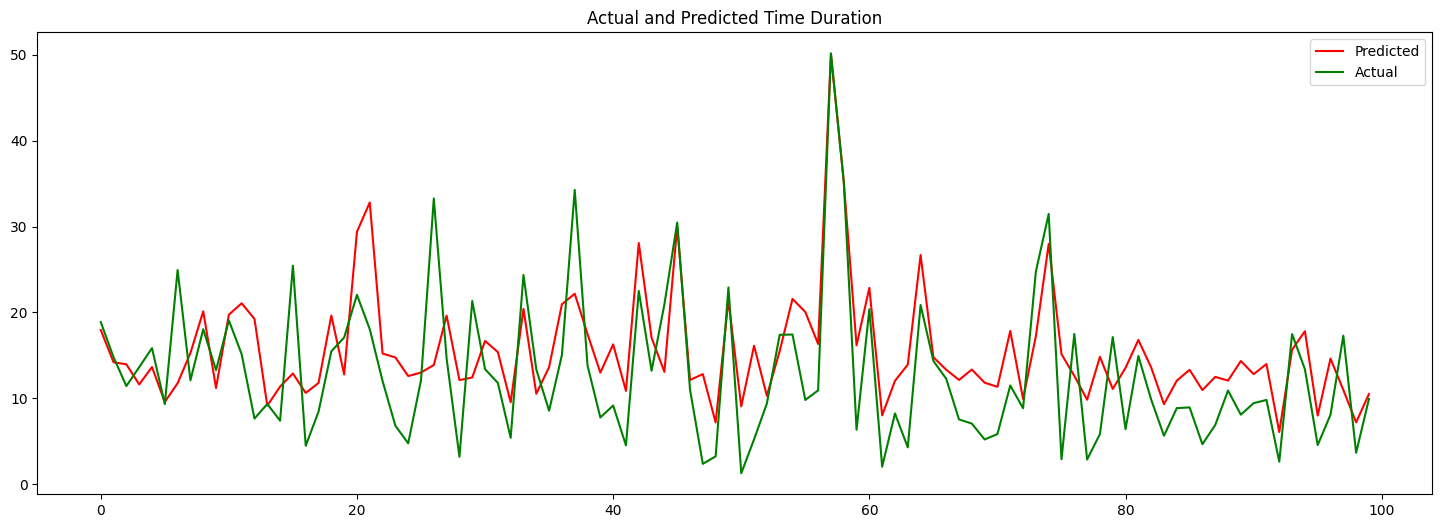

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 2866.1096 Root Mean Squared Error: 53.536058876237796
R2 Score : 0.02585451885395218 Adjusted R2 Score : 0.025807767457940778


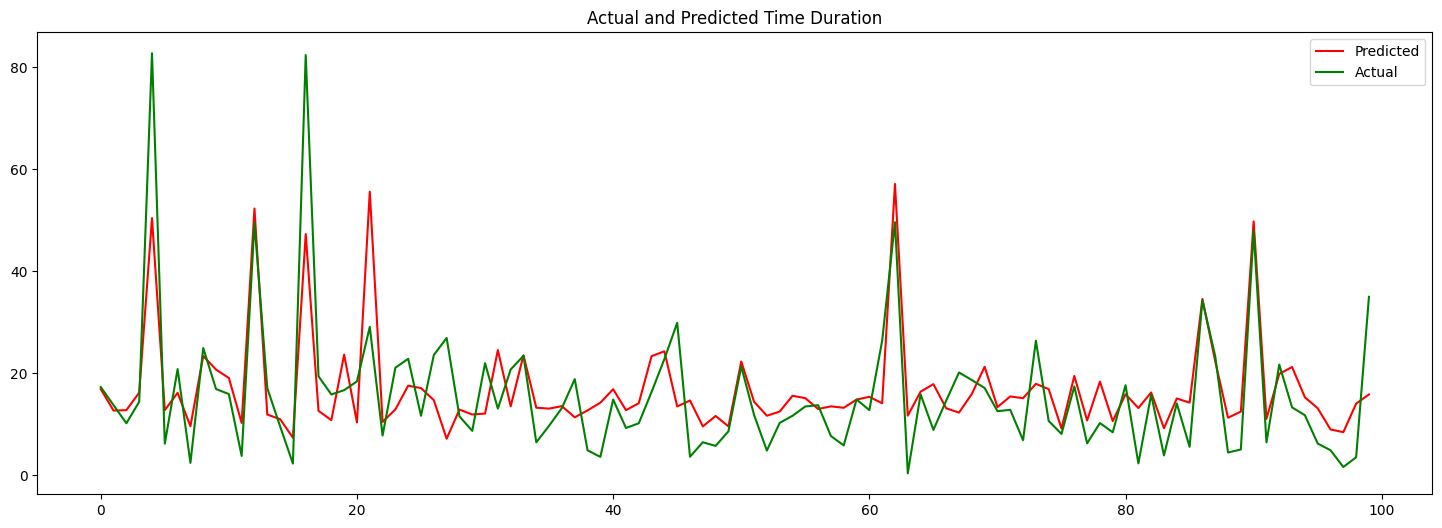

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)

Inference - As we can see that R2 score is very less and MSE is pretty high which means this algorithm is not suitable for our model


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

These metrics suggest that the model is not performing well:

The high RMSE shows substantial prediction errors.
The low R2 and Adjusted R2 scores indicate that the model is barely able to explain the variation in the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2


#Decision Tree

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6,10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
DTR = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=DTR,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')
decision_tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=30; total time=   2.8s
[CV] END max_depth=4, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [6, 10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
decision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=20, min_samples_split=10)

In [ ]:
decision_tree_grid.best_score_

0.5616650837943309

In [ ]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_
y_predict_train_decision_tree=decision_tree_optimal_model.predict(x_train)
y_predict_test_decision_tree=decision_tree_optimal_model.predict(x_test)

Mean Squared Error: 18.5692 Root Mean Squared Error: 4.309199461616972
R2 Score : 0.5771737805086035 Adjusted R2 Score : 0.577167271083462


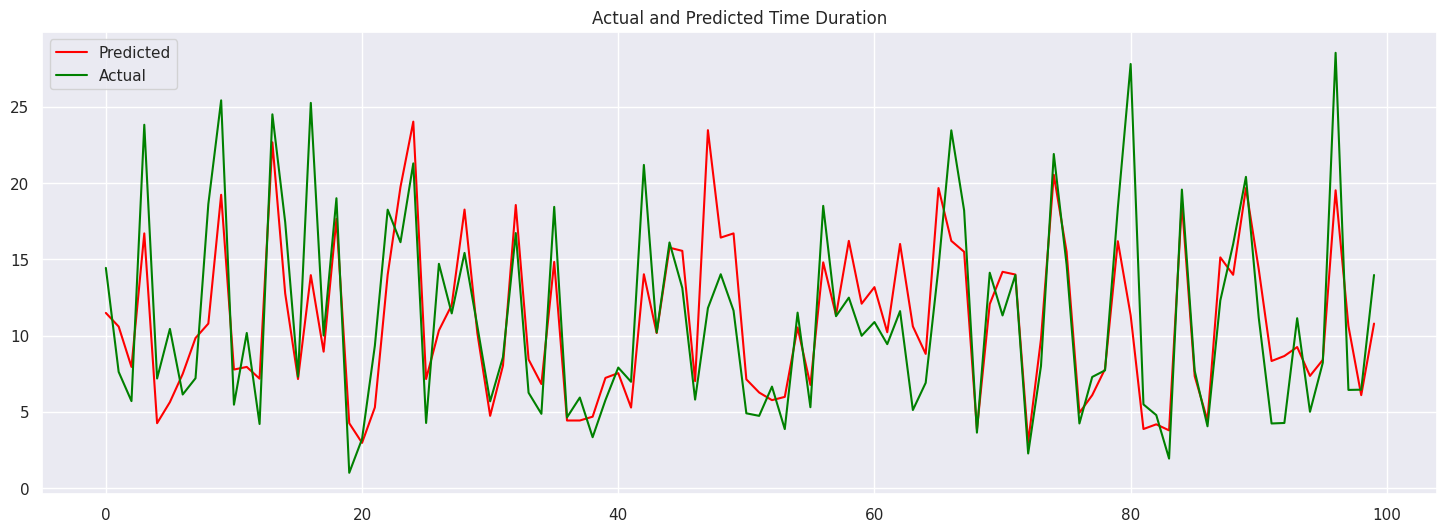

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_decision_tree)

Mean Squared Error: 19.0282 Root Mean Squared Error: 4.3621325060112515
R2 Score : 0.5666718437519356 Adjusted R2 Score : 0.5666451580493932


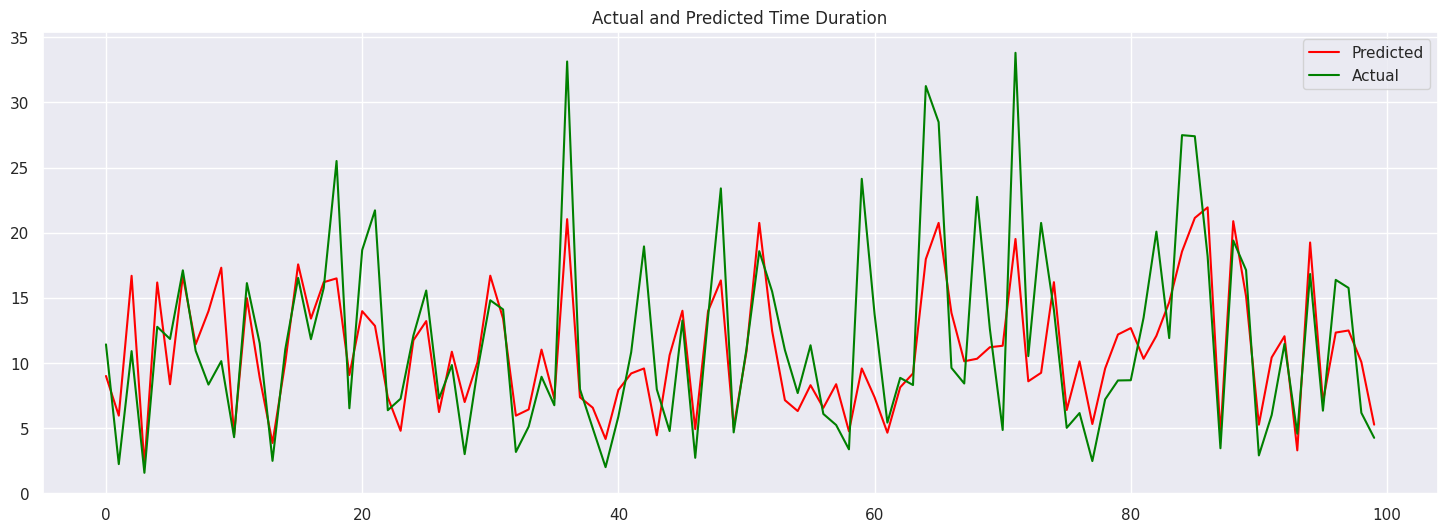

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_decision_tree)

Inference - This algorithm is better than the previous one (linear regression) but still the accuracy score is low.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

#Random Forest

In [ ]:
RFR=RandomForestRegressor()

In [ ]:
# ML Model - 3 Implementation

# number of trees in random forest
n_estimators=[20,22,24]
#number of feature to consider at every split
max_features=[0.6]
# maximum number of level in trees
max_depth=[10,16]
#number of samples
max_samples=[0.75,1.0]

# Hyperparameter Grid
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            }
print(param_grid)

# Fit the Algorithm

# Predict on the model

{'n_estimators': [20, 22, 24], 'max_features': [0.6], 'max_depth': [10, 16], 'max_samples': [0.75, 1.0]}


In [ ]:
RF_grid=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=2,verbose=2)

In [ ]:
RF_grid.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  33.0s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  33.8s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  36.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  35.8s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  42.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  45.9s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  49.8s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  49.9s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time=  45.3s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 16], 'max_features': [0.6],
                         'max_samples': [0.75, 1.0],
                         'n_estimators': [20, 22, 24]},
             verbose=2)

In [ ]:
RF_grid.best_params_

{'max_depth': 16, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 24}

In [ ]:
RF_grid.best_score_

0.601860255591078

In [ ]:
Random_Forest_optimal_model =RF_grid.best_estimator_
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(x_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(x_test)

Mean Squared Error: 14.3078 Root Mean Squared Error: 3.782565267117013
R2 Score : 0.6742057851658394 Adjusted R2 Score : 0.6742007695519648


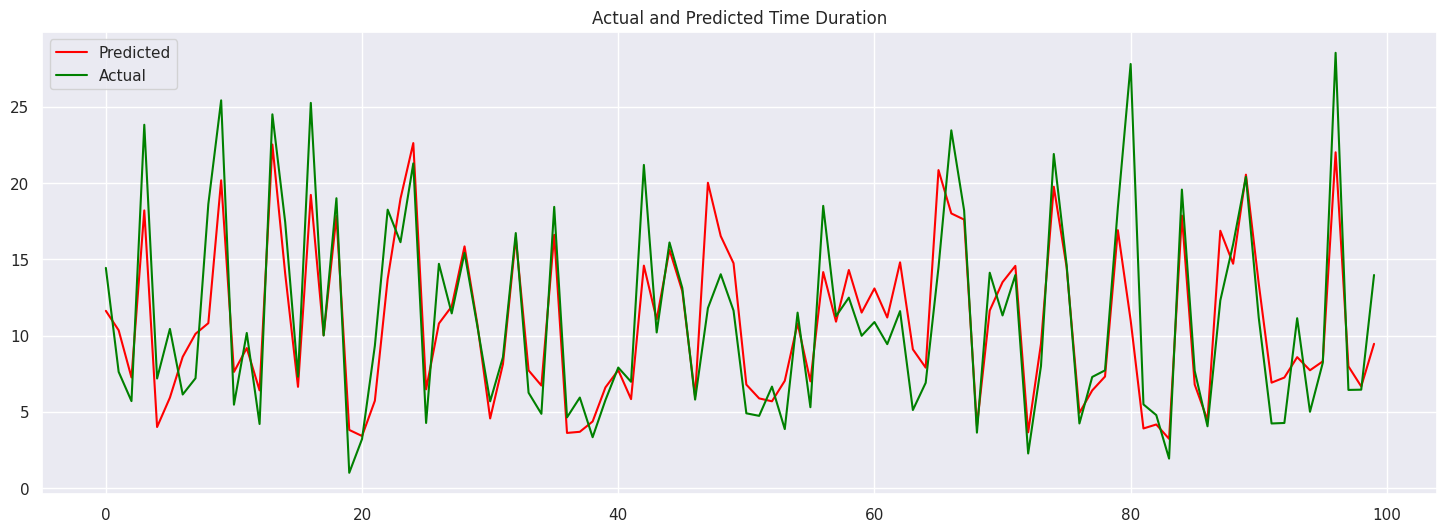

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_Random_Forest)

Mean Squared Error: 17.0814 Root Mean Squared Error: 4.132965037355143
R2 Score : 0.6110049433209452 Adjusted R2 Score : 0.6109809877892695


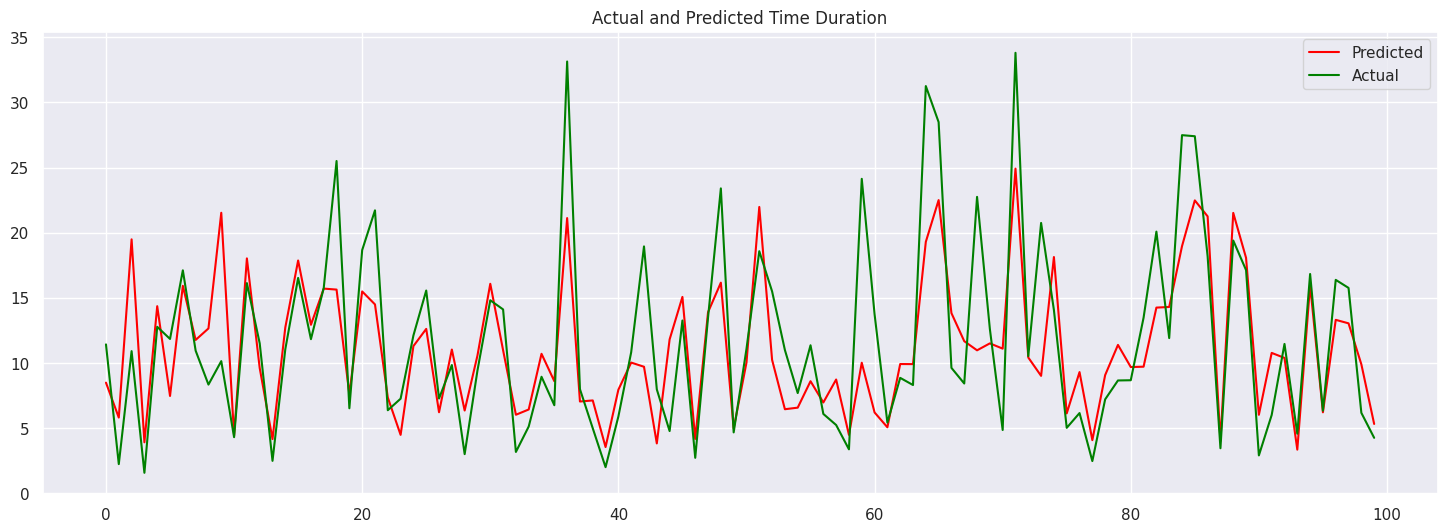

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_Random_Forest)

##This algorithm has performed a little better that the previous one (accuracy score:67% train, 60% test).

#Model - 4

#Gradient Boost

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor()
gradient_boost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_preds_gradient_boost_test = gradient_boost_model.predict(x_test)
y_pred_gradient_boost_train=gradient_boost_model.predict(x_train)

In [ ]:
#Evaluation metrics for Train set
evaluation_metrics(x_train,y_train,y_pred_gradient_boost_train)

In [ ]:
#Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_preds_gradient_boost_test)

##Above algorithm has an accuracy score of 55% which is lower that our previous algorithm (XG Boost)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

#**Comparing evaluation metrics of different models**

In [ ]:
# list of all evaluation matrics values
score_values=[[22.5249,4.746040454947682,0.48710009447510005,0.4870921983622618],
              [18.5693,4.309211064684578,0.5771718360098075,0.5771653265547303],
              [14.3663,3.790290226354705,0.672873788148407,0.6728687520283896],
              [19.6792,4.436124434683951,0.5518977478192577,0.5518908492686668]]
# Create the pandas DataFrame
df_score = pd.DataFrame(score_values,columns=['MSE', 'RMSE', 'R2', 'AdjustedR2'], index=['Linear Regression', 'Decision Tree', 'Random Forest',  'Gradientboost'])
df_score

,MSE,RMSE,R2,AdjustedR2
Linear Regression,22.5249,4.746040,0.487100,0.487092
Decision Tree,18.5693,4.309211,0.577172,0.577165
Random Forest,14.3663,3.790290,0.672874,0.672869
Gradientboost,19.6792,4.436124,0.551898,0.551891


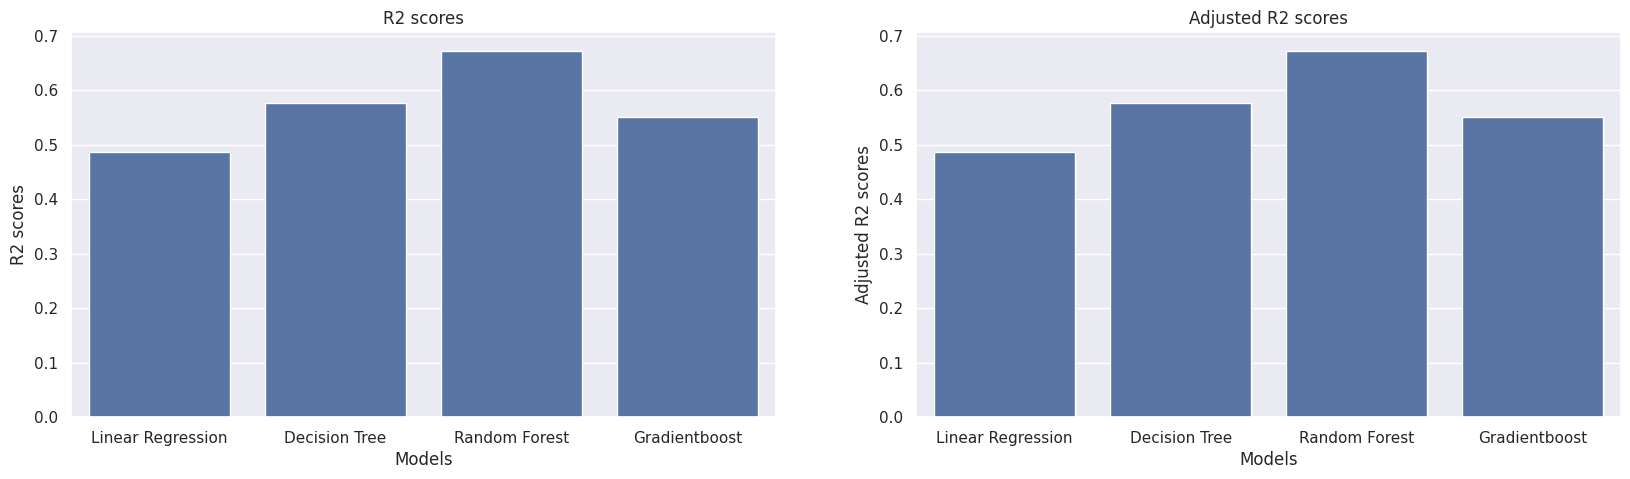

In [ ]:
#bar plot for R2 score
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradientboost']
ax1.set_title('R2 scores')
ax = sns.barplot(x = x_, y='R2', data =df_score , ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('R2 scores')

# barplot for adjustedR2
ax = sns.barplot(x = x_, y='AdjustedR2',  data = df_score, ax = ax2)
ax2.set_title('Adjusted R2 scores')
ax.set_xlabel('Models')
ax.set_ylabel('Adjusted R2 scores')
plt.show()

##The above graph clearly shows that Random forest has highest R2 scores and adjusted R2 score which suggests that it has better efficiency than other models.

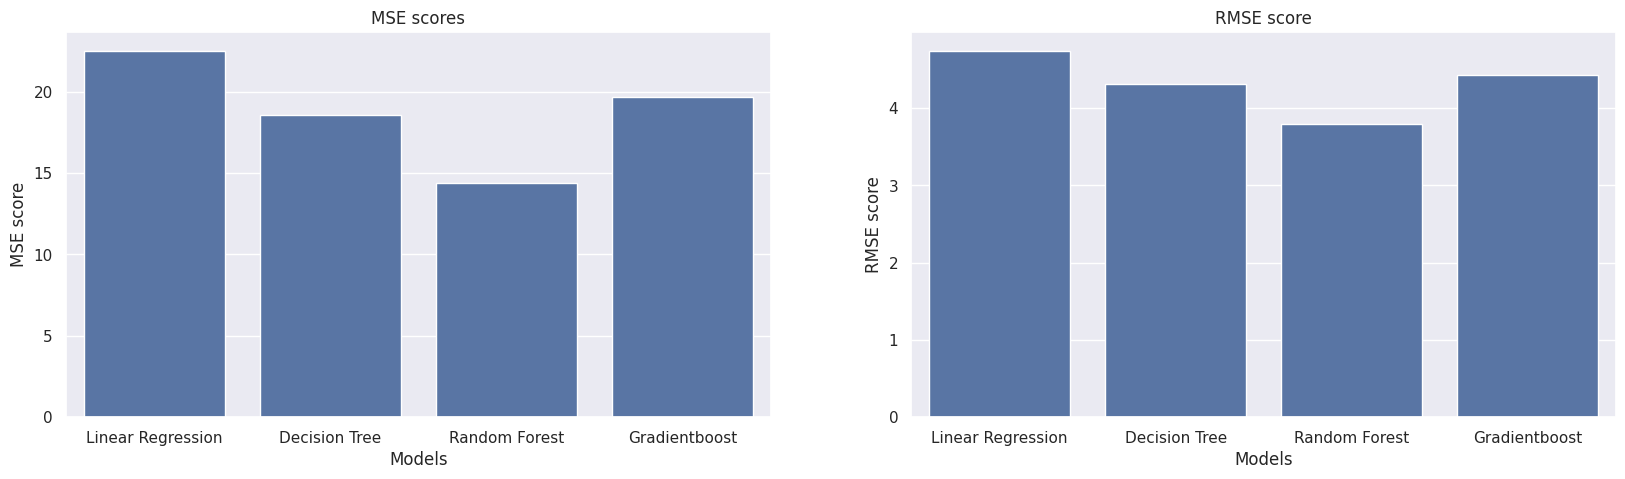

In [ ]:
#barplot of MSE score
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'Random Forest',  'Gradientboost']
ax1.set_title('MSE scores')
ax = sns.barplot(x = x_, y='MSE', data =df_score , ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('MSE score')

# barplot for RMSE score
ax = sns.barplot(x = x_, y='RMSE',  data = df_score, ax = ax2)
ax2.set_title('RMSE score')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE score')
plt.show()

##Only Random Forest has least errors, therefore it can be considered as good algorithm for training our model.

# **Conclusion**

#**Conclusion for EDA:**
*   Vendor id distribution shows Vendor 2 receives more number of bookings
*   Store_and_ fwd_flag Count shows that majority of the time the taxi driver hasn't logged onto the vendor's systems.

*   Distribution of pickups and dropoffs on daily basis interprets that we can see that compared to other days, taxi booking rates are higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.
*   Distribution of pickups and dropoffs on monthly basis shows that taxi reservations were more in the month of March and April.

*  Monthly trend for vendors tells us that both  vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June.
*   Distribution of pickups and dropoffs on hourly basis gives us the insight that people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

*  Passenger count distribution shows that most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo

# **Conclusion for Model Training:**


*   There were a lot of outliers in our variables some values were near to zero, we tried to remove those values but we found that we were losing a lot of data.
 we trained our model using various algorithms and we got an accuracy of 67%.

*   we were curious whether the model was overfit or not, hopefully it was not, as it gave pretty much similar results for train and test data in all the algorithms tried.
*   In all the above model's graph we saw that actual and predicted values are almost near to each other (lines coinciding) in only 2 models namely: **XG Boost** and **Random Forest**.
 **R2 scores** were also **high** for the above two models and **MSE scores** were also **low** in these models which satisafies the requirements of a good model.

*    So we came to a conclusion that removing data removes a lot of information, new column if highly collinear can give pseudo good results,also we got our best R2 score from **Random Forest** model,we tried taking an optimum parameter so that our model doesnt overfit.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***